In [1]:
import geopandas

In [2]:
ncov_cases_us_url = 'https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases_US/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson'


In [3]:
usa_counties_generalized_url = 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Counties_Generalized/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson'

In [4]:
usa_states_generalized_url = 'https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/USA_States_Generalized/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson'

In [5]:
def state_urls(state_name):
    state_name = state_name.replace(' ', '+')
    counties_url = f'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Counties_Generalized/FeatureServer/0/query?where=STATE_NAME%3D%27{state_name}%27&outFields=*&returnGeometry=true&f=pgeojson'

    cases_url = f'https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases_US/FeatureServer/0/query?where=Province_State%3D%27{state_name}%27&outFields=*&returnGeometry=true&f=pgeojson'

    return {
        'counties_url': counties_url,
        'cases_url': cases_url
    }



In [14]:
colorado_urls = state_urls('Colorado')

In [7]:
colorado_cases = geopandas.read_file(colorado_urls['cases_url'])[['Confirmed', 'Recovered', 'Deaths', 'Active', 'FIPS']]

In [8]:
colorado_counties = geopandas.read_file(colorado_urls['counties_url'])

In [9]:
colorado_county_cases = colorado_counties.merge(colorado_cases, on='FIPS')

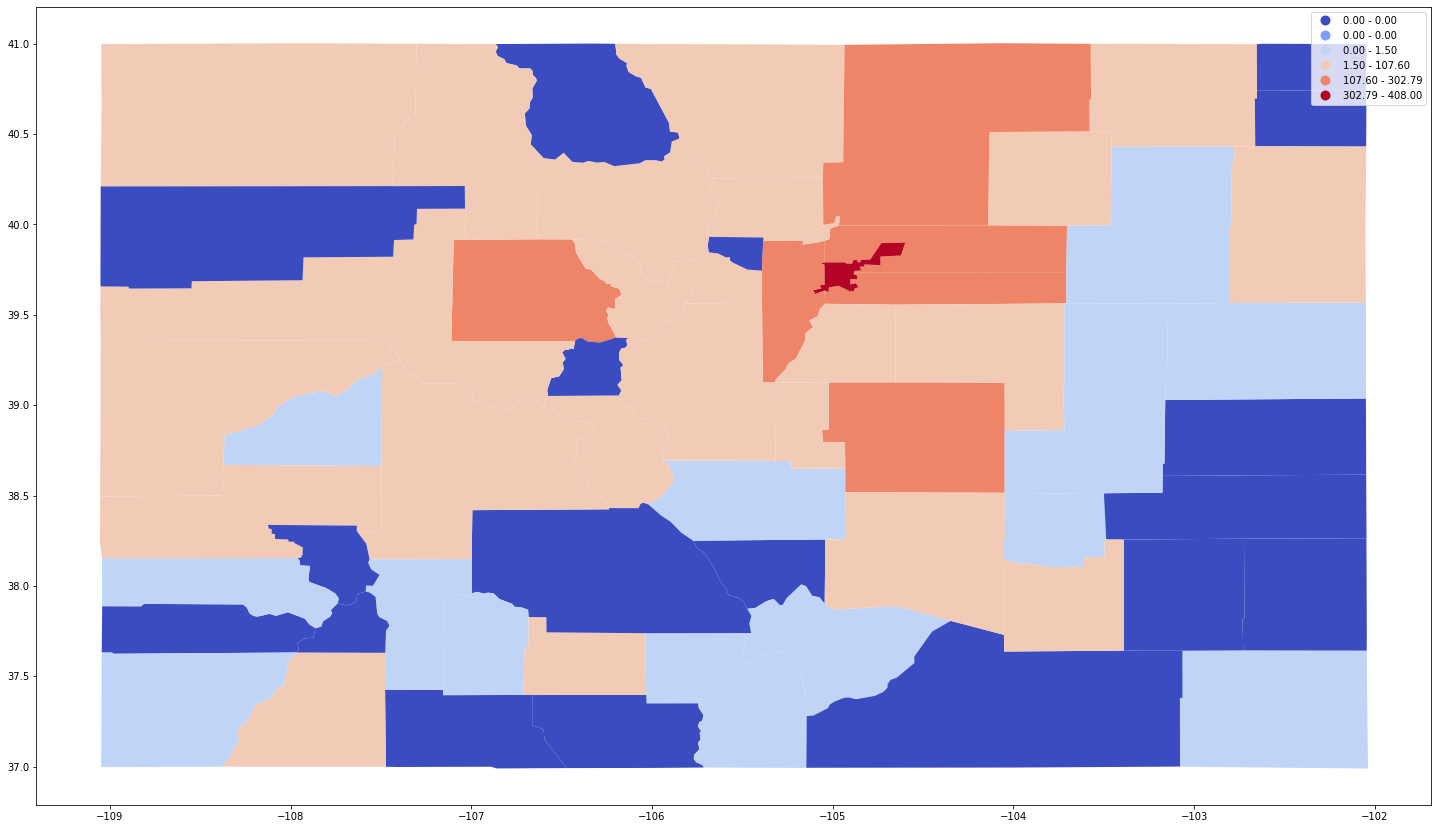

In [10]:
colorado_county_cases.plot(column='Confirmed', cmap='coolwarm', scheme='percentiles', figsize=(25,25), legend='True')

In [11]:
us_cases = geopandas.read_file(ncov_cases_us_url).cx[-120:-15, :]

In [12]:
states = geopandas.read_file(usa_states_generalized_url).cx[-120:-15, :]

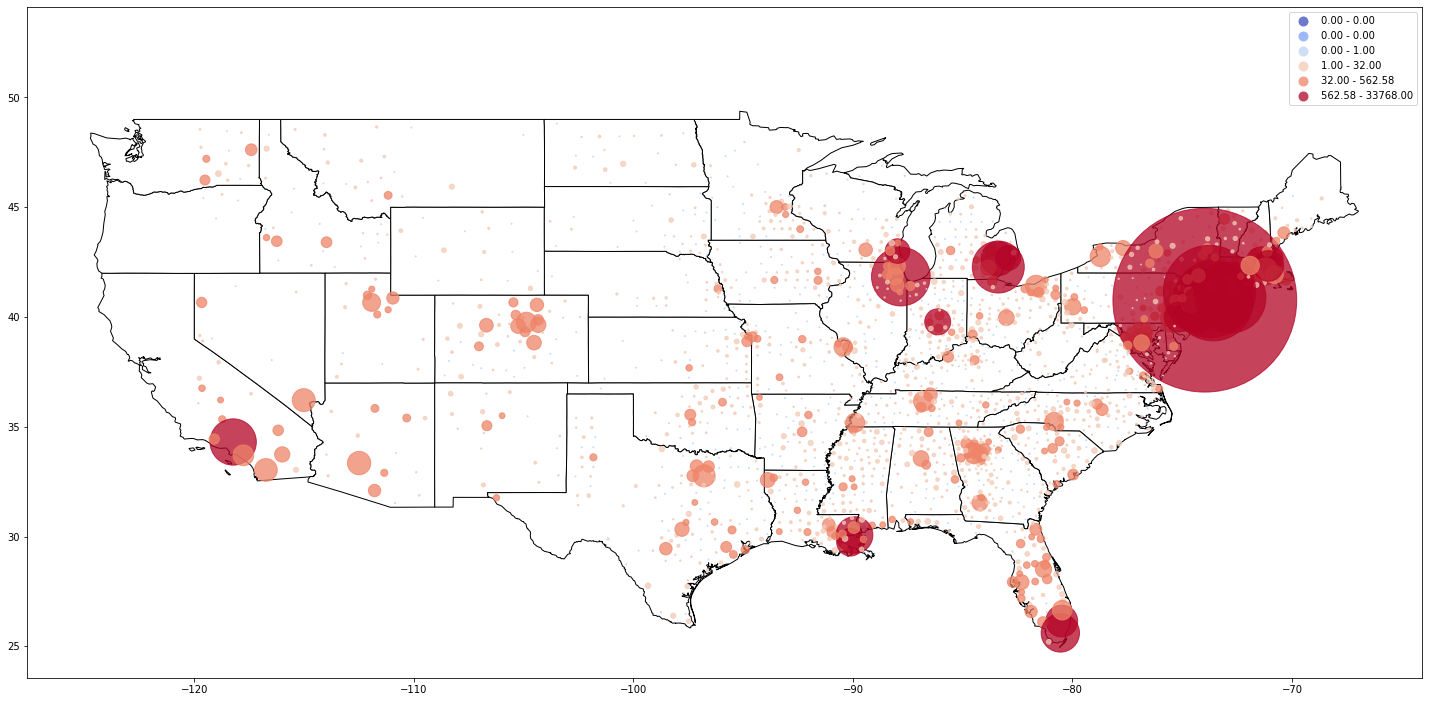

In [13]:
base = states.plot(color='white', edgecolor='black', figsize=(25,25))
us_cases.plot(ax=base, column='Confirmed', cmap='coolwarm', scheme='percentiles', alpha=0.75, markersize=us_cases['Confirmed'], figsize=(25,25), legend='True')


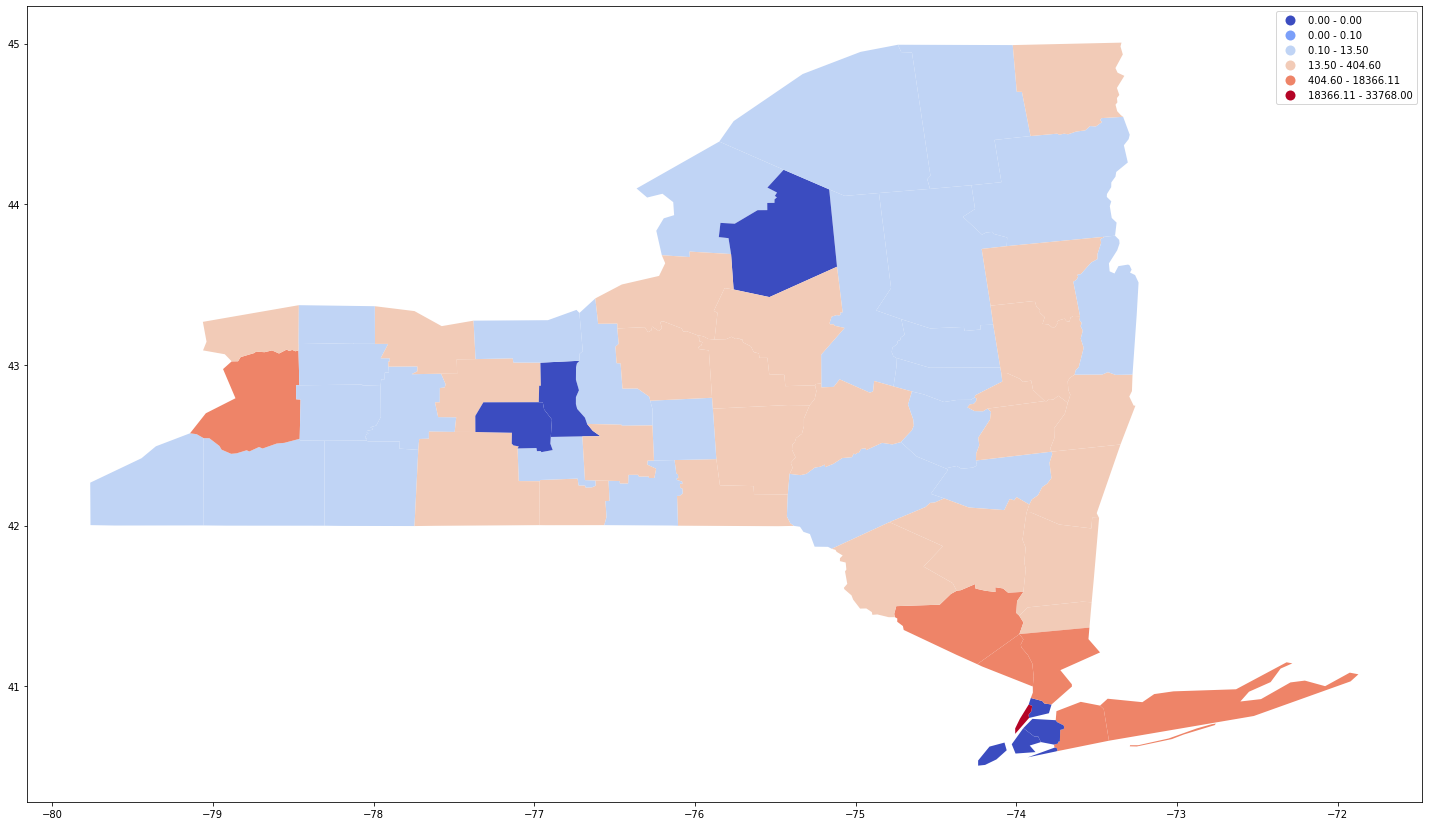

In [19]:
ny_urls = state_urls('New York')
ny_cases = geopandas.read_file(ny_urls['cases_url'])[['Confirmed', 'Recovered', 'Deaths', 'Active', 'FIPS']]
ny_counties = geopandas.read_file(ny_urls['counties_url'])
ny_county_cases = ny_counties.merge(ny_cases, on='FIPS')
ny_county_cases.plot(column='Confirmed', cmap='coolwarm', scheme='percentiles', figsize=(25,25), legend='True')